In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import time

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import statsmodels.api as sm

In [5]:
loantr_df =r"C:\Users\balaj\Desktop\LoanPred_train.csv"

In [6]:
loantr_df = pd.read_csv(r"C:\Users\balaj\Desktop\LoanPred_train.csv")

In [7]:
loantr_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
loantr_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
loante_df =r"C:\Users\balaj\Desktop\LoanPred_test.csv"

In [9]:
loante_df =pd.read_csv(r"C:\Users\balaj\Desktop\LoanPred_test.csv")

In [9]:
loante_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [14]:
loante_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [17]:
loantr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


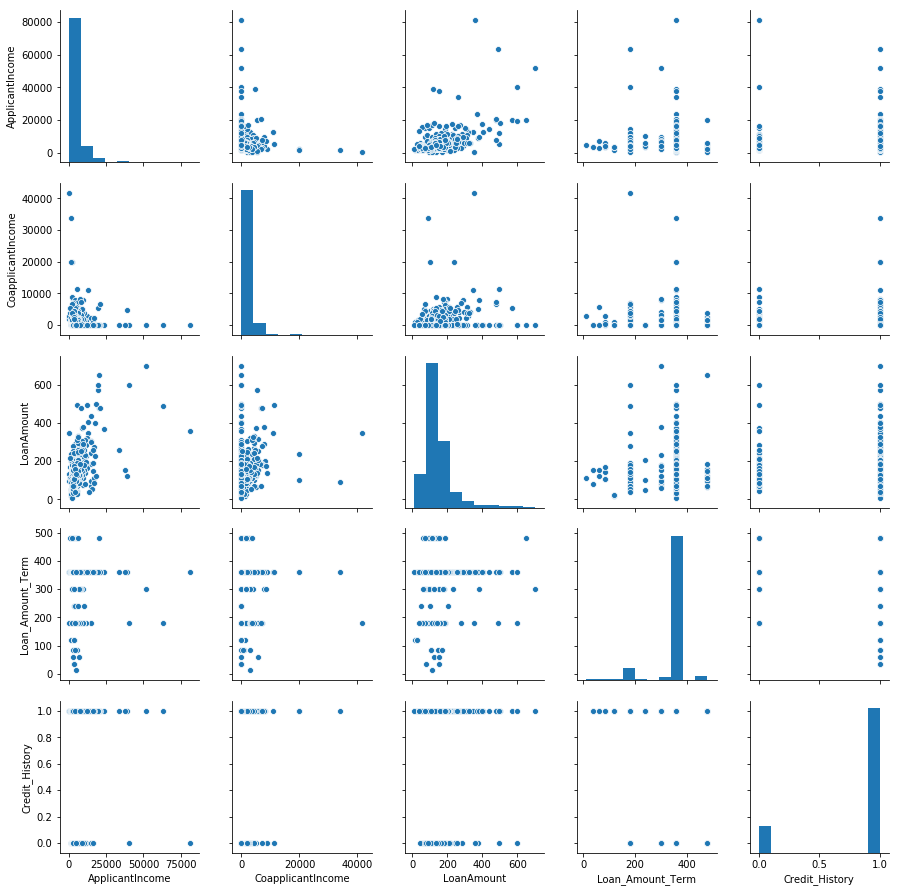

In [18]:
sns.pairplot(loantr_df)

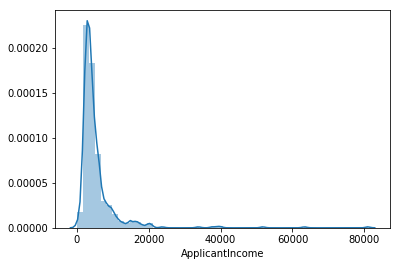

In [23]:
sns.distplot(loantr_df.ApplicantIncome)

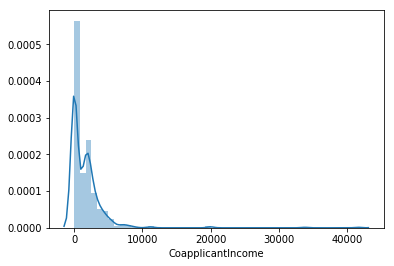

In [24]:
sns.distplot(loantr_df.CoapplicantIncome)

In [10]:
loantr_df.LoanAmount	= loantr_df.LoanAmount.fillna(loantr_df.LoanAmount.mean())
loantr_df.LoanAmount.isnull().sum()

0

In [11]:
total_income = loantr_df.ApplicantIncome+loantr_df.CoapplicantIncome

In [12]:
loantr_df['total_income'] = total_income

In [86]:
loantr_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,23809.0


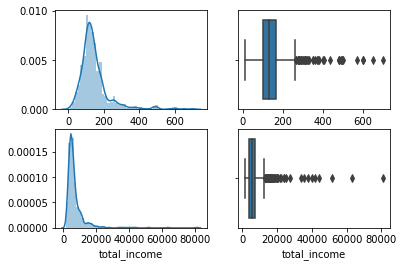

In [34]:
plt.subplot(2,2,1)
sns.distplot(loantr_df.LoanAmount)
plt.subplot(2,2,2)
sns.boxplot(loantr_df.LoanAmount)
plt.subplot(2,2,3)
sns.distplot(loantr_df.total_income)
plt.subplot(2,2,4)
sns.boxplot(loantr_df.total_income)

<Figure size 1080x504 with 0 Axes>

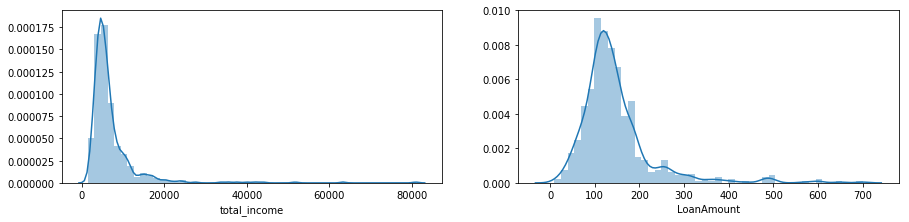

In [36]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(loantr_df.total_income)
plt.subplot(2,2,2)
sns.distplot(loantr_df.LoanAmount)

In [13]:
loantr_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [14]:
Loanamount_log = np.log(loantr_df.LoanAmount)

In [15]:
loantr_dfTotalincome_log= np.log(loantr_df.total_income)

In [16]:
loantr_df['Loanamount_log'] = np.log(loantr_df.LoanAmount)

In [17]:
loantr_df['Totalincome_log']= np.log(loantr_df.	total_income)

In [18]:
loantr_df.head( )

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,Loanamount_log,Totalincome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,4.948760,8.699515


In [19]:
loantr_df.Gender.fillna(loantr_df.Gender.mode()[0],inplace =True)

In [20]:
loantr_df.Education.fillna(loantr_df.Education.mode()[0],inplace =True)

In [21]:
loantr_df.Married.fillna(loantr_df.Married.mode()[0],inplace =True)

In [22]:
loantr_df.Self_Employed.fillna(loantr_df.Self_Employed.mode()[0],inplace =True)

In [23]:
loantr_df.Dependents.fillna(loantr_df.Dependents.mode()[0],inplace =True)

In [24]:
loantr_df.Loan_Amount_Term.fillna(loantr_df.Loan_Amount_Term.mode()[0],inplace =True)

In [25]:
loantr_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income', 'Loanamount_log', 'Totalincome_log'],
      dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder
cat_col =['Gender','Married','Dependents','Education','Property_Area','Self_Employed','Loan_Status']

label_encode = LabelEncoder()
for i in cat_col:
    loantr_df[i]=label_encode.fit_transform(loantr_df[i])
    
loantr_df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
total_income         float64
Loanamount_log       float64
Totalincome_log      float64
dtype: object

In [27]:
loantr_df.Credit_History.fillna(loantr_df.Credit_History.mode()[0],inplace=True)
loantr_df.Credit_History.isnull().sum()

0

In [28]:
loantr_df.Loanamount_log.isnull().sum()

0

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
feature_cols1 = ['Credit_History','Loan_Amount_Term','Loanamount_log']
y =loantr_df.Loan_Status

DT_model =  DecisionTreeClassifier()           

In [30]:
DT_model.fit(loantr_df[feature_cols1],y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
loantr_df_predict =DT_model.predict(loantr_df[feature_cols1])


In [32]:
accuracy = metrics.accuracy_score(y,loantr_df_predict)
print('Accuracy : %s'% '(0:.3%)',format(accuracy))

Accuracy : (0:.3%) 0.8941368078175895
